# EDA

Es importante mencionar que estos datos son sintéticos, por lo que serán muy buenos.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
df = pd.read_csv('kafka_data.csv')

## Ver formato de datos

In [15]:
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,user_id,item_id,rating,timestamp,location,comments
0,2.0,2.0,3.0,2023-04-13,Phoenix,Could be better
1,25.0,9.0,NaN,2023-06-29,Houston,Excellent
2,18.0,8.0,4.0,2023-04-03,Phoenix,NaN
3,29.0,3.0,1.0,2023-01-15,NaN,Could be better
4,NaN,8.0,3.0,2023-04-17,Phoenix,Average


In [16]:
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1809 non-null   float64
 1   item_id    1805 non-null   float64
 2   rating     1659 non-null   float64
 3   timestamp  2000 non-null   object 
 4   location   1811 non-null   object 
 5   comments   1281 non-null   object 
dtypes: float64(3), object(3)
memory usage: 93.9+ KB


In [17]:
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


,user_id,item_id,rating,timestamp,location,comments
count,1809.000000,1805.000000,1659.000000,2000,1811,1281
unique,NaN,NaN,NaN,180,5,5
top,NaN,NaN,NaN,2023-06-28,Chicago,Poor
freq,NaN,NaN,NaN,19,375,270
mean,14.974019,7.527424,3.004822,NaN,NaN,NaN
std,8.353229,4.020450,1.406079,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,8.000000,4.000000,2.000000,NaN,NaN,NaN
50%,15.000000,8.000000,3.000000,NaN,NaN,NaN
75%,22.000000,11.000000,4.000000,NaN,NaN,NaN


## Distribución de veces que se han reproducido las canciones

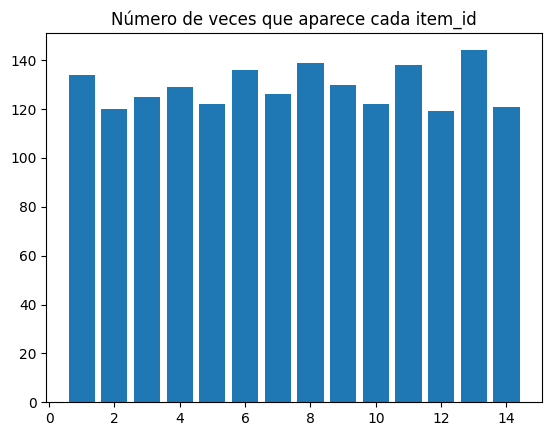

In [30]:
song_count = df['item_id'].value_counts()
plt.figure()
plt.bar(song_count.index, song_count.values)
plt.title('Número de veces que aparece cada item_id')
plt.show()

Se observa que las reproducciones de distribuyen de forma bastante uniforme.

## Distribución de ratings

<AxesSubplot:title={'center':'Histograma de rating'}, ylabel='Frequency'>

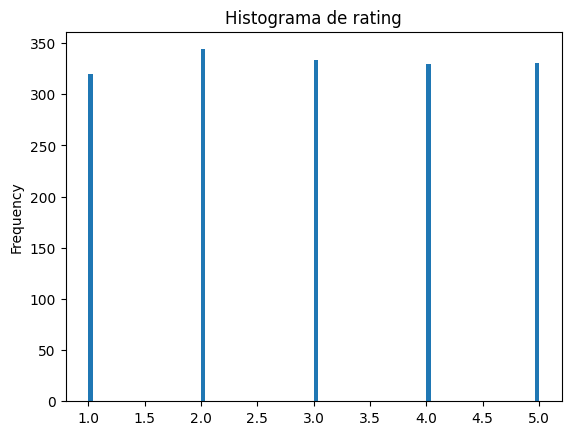

In [23]:
df['rating'].plot(kind='hist', bins=100, title='Histograma de rating')

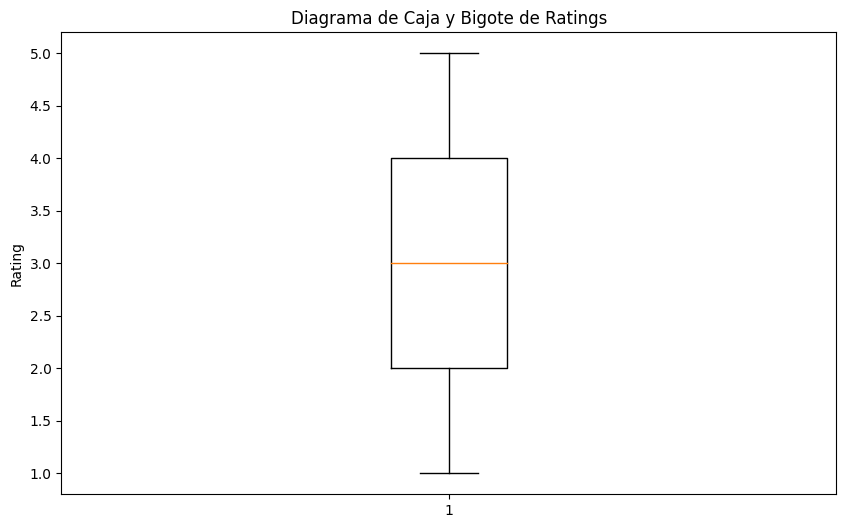

In [32]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['rating'].dropna())
plt.title('Diagrama de Caja y Bigote de Ratings')
plt.ylabel('Rating')
plt.show()

Se observa que los ratings están distribuidos de forma bastante uniforme.

## Distribución de ciudades

In [25]:
location_counts = df['location'].value_counts()

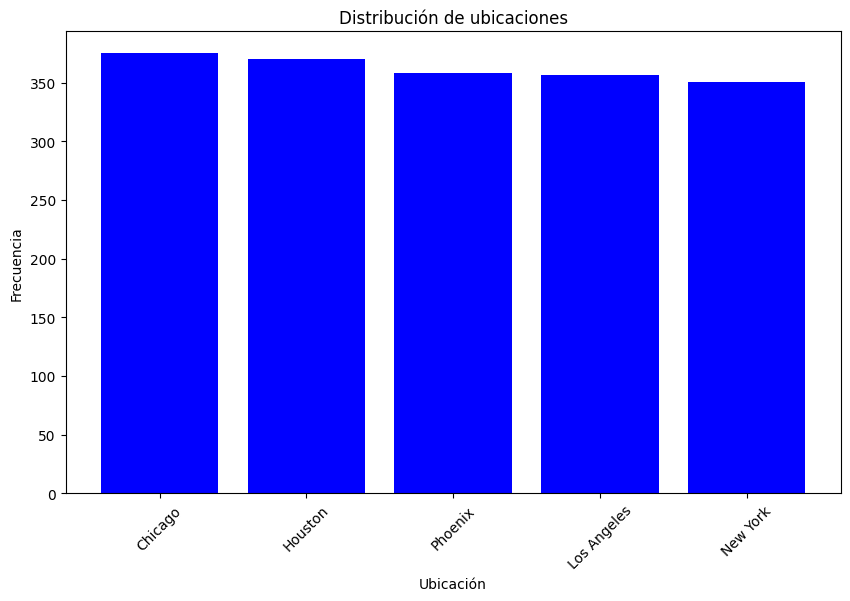

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values, color='blue')
plt.title('Distribución de ubicaciones')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

La distribución de las ciudades es bastante uniforme.

## ¿Cuántas canciones se escuchan al mes?

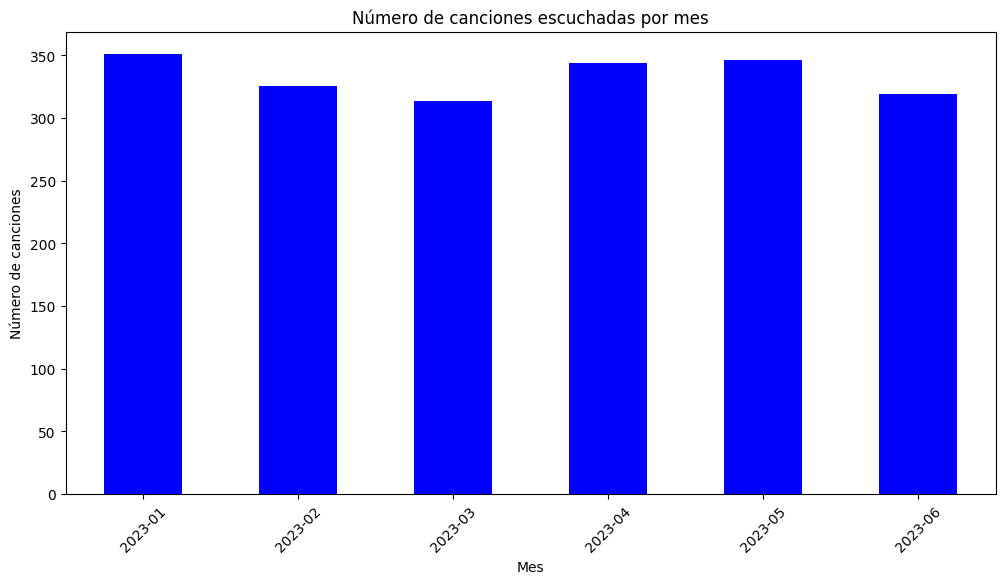

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraer el mes y el año de la columna 'timestamp'
df['month_year'] = df['timestamp'].dt.to_period('M')

# Contar el número de canciones escuchadas por mes
songs_per_month = df['month_year'].value_counts().sort_index()

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))
songs_per_month.plot(kind='bar', color='blue')
plt.title('Número de canciones escuchadas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)
plt.show()

## Wordcloud de comentarios

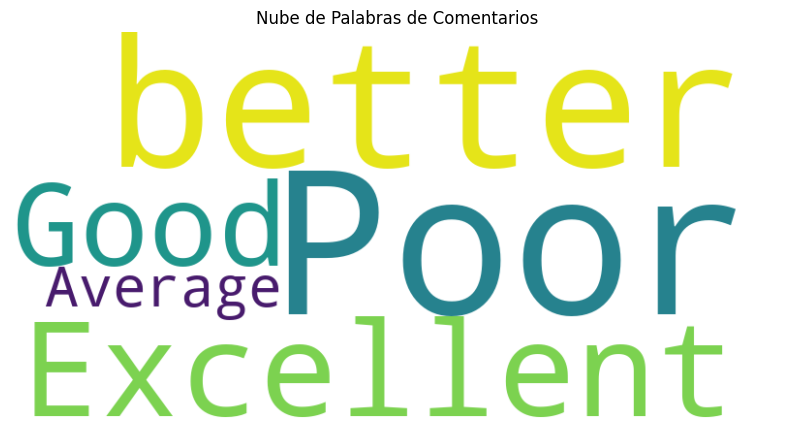

In [35]:
comments_text = ' '.join(comment for comment in df['comments'].dropna() if isinstance(comment, str))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de Comentarios')
plt.show()

## Cantidad de NA por columna

In [36]:
na_counts = df.isna().sum()
print("Cantidad de valores NA por columna:")
print(na_counts)

Cantidad de valores NA por columna:
user_id       191
item_id       195
rating        341
timestamp       0
location      189
comments      719
month_year      0
dtype: int64
